<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
# data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv('survey_data.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [6]:
## Write your code here
df['Employment'].value_counts(dropna=False)

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

In [7]:
df['JobSat'].value_counts(dropna=False)

JobSat
NaN     36311
8.0      7509
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

In [8]:
df['RemoteWork'].value_counts(dropna=False)

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64

To handle missing values in critical columns such as Employment, JobSat, and RemoteWork, the strategy should depend on:

    How much data is missing (proportion of missing values)

    The importance of the column to your analysis or model

    Whether the column is categorical or numerical

     Recommended Strategy Per Column:
     

1. Employment (Categorical & Critical)

    Importance: Very high — it defines the respondent's working status.

    Strategy:

        If missing < 5–10% → impute with the mode (most frequent value).

        If missing > 20% → consider adding a new category like 'Unknown' or dropping rows if it's critical.



In [11]:
# 1. Check the percentage of missing values:

missing = df[['Employment', 'JobSat', 'RemoteWork']].isnull().mean() * 100
print(missing)

Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64


1. Employment 0 missing values and critical. nothing to replace.

2.Job Satisfaction or JobSat- ordinal,  categorical. 55% missing, considering replacing missing data with Unknown value since we don
t know the goal of the survey ie is it critical or not 

In [14]:
df['JobSat'].fillna('Unknown', inplace=True)
df['JobSat'].value_counts(dropna=False)

C:\Users\serge\AppData\Local\Temp\ipykernel_7008\2461686922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna('Unknown', inplace=True)
C:\Users\serge\AppData\Local\Temp\ipykernel_7008\2461686922.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['JobSat'].fillna('Unknown', inplace=True)


JobSat
Unknown    36311
8.0         7509
7.0         6379
6.0         3751
9.0         3626
10.0        2251
5.0         1956
3.0         1165
4.0         1130
2.0          772
0.0          311
1.0          276
Name: count, dtype: int64

3. Remote work categorical. 

Strategy:

If used in key analysis (e.g., productivity or compensation by work mode), keep and impute.

If not critical → drop or mark as 'Unknown'.

16% missing, considering replacing missing data with Unknown value since we don't know the goal of the survey ie is it critical or not.



In [16]:
df['RemoteWork'].fillna('Unknown', inplace=True)
df['RemoteWork'].value_counts(dropna=False)

C:\Users\serge\AppData\Local\Temp\ipykernel_7008\1377141024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna('Unknown', inplace=True)


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Unknown                                 10631
Name: count, dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [19]:
## Write your code here


# Step 1: Replace textual values and convert to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Define function to assign experience levels
def classify_experience(years):
    if pd.isnull(years):
        return 'Unknown'
    elif years <= 1:
        return 'Beginner'
    elif years <= 5:
        return 'Intermediate'
    elif years <= 10:
        return 'Advanced'
    else:
        return 'Expert'

# Step 3: Apply function to create new column
df['ExperienceLevel'] = df['YearsCodePro'].apply(classify_experience)

df['ExperienceLevel'].value_counts(dropna=False)

ExperienceLevel
Expert          18460
Intermediate    15002
Unknown         13827
Advanced        12653
Beginner         5495
Name: count, dtype: int64

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\serge\AppData\Local\Temp\ipykernel_7008\4170577755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='pastel')


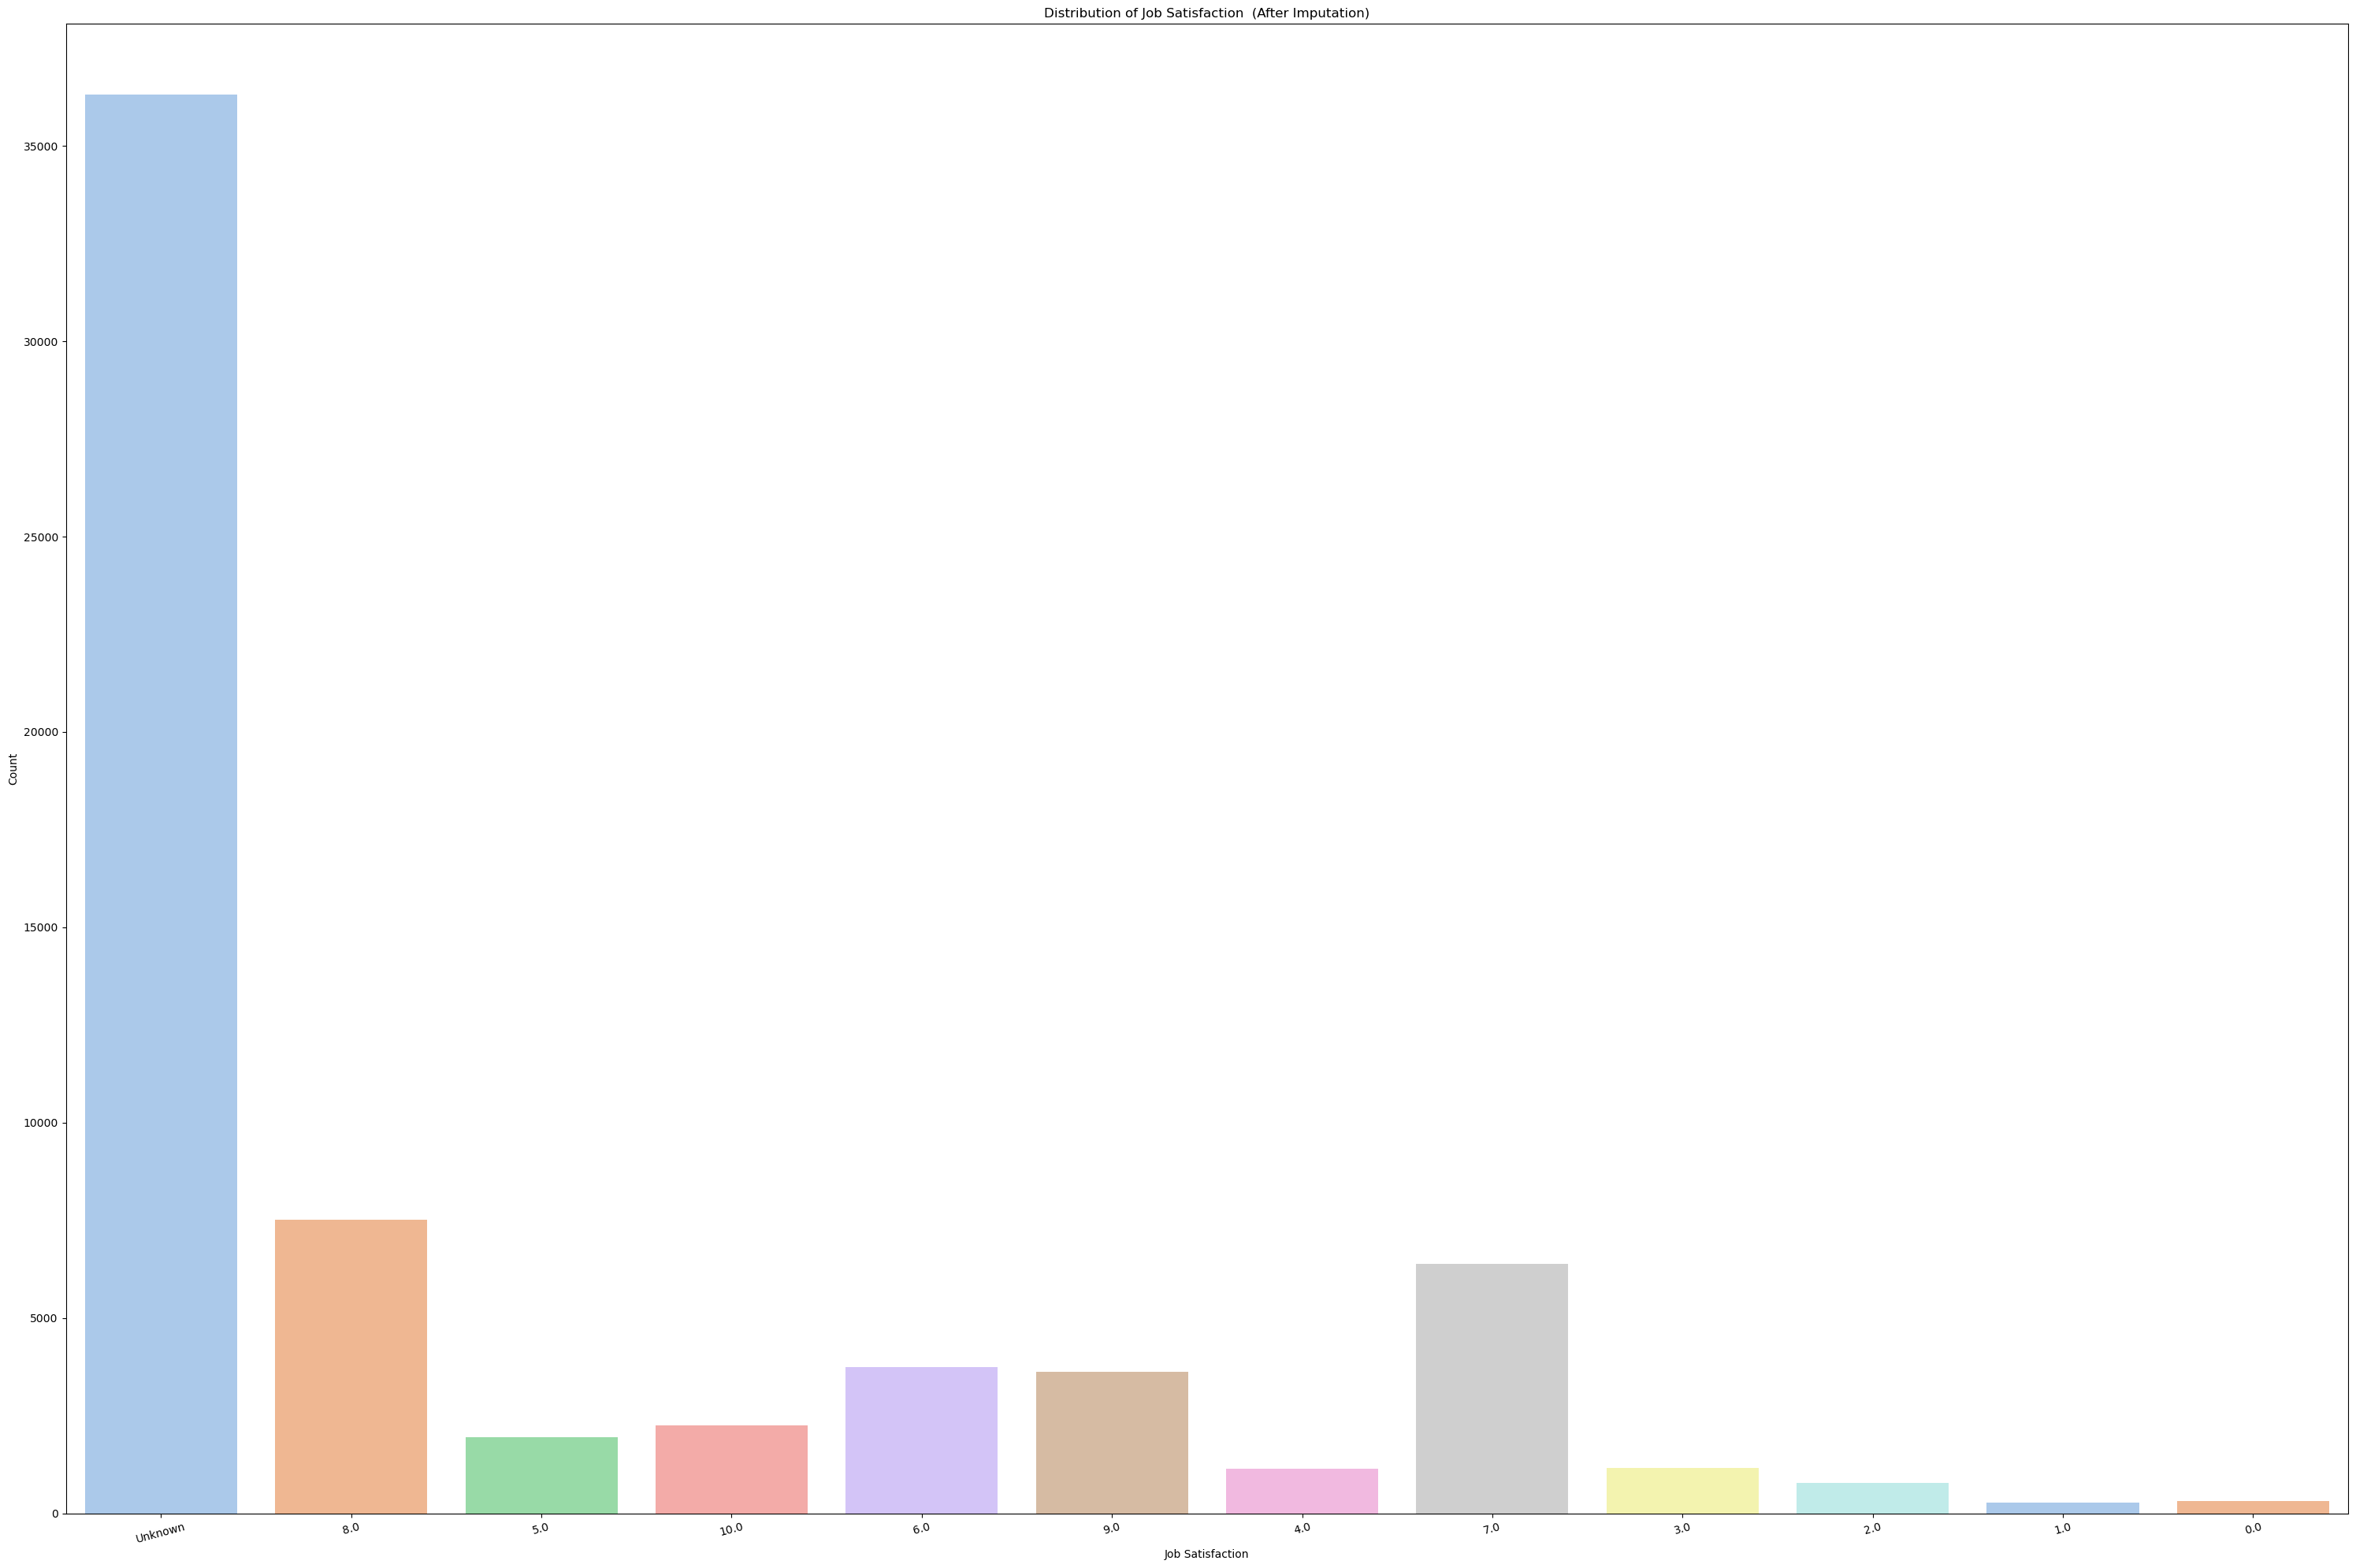

In [22]:
## Write your code here
plt.figure(figsize=(30, 20))
sns.countplot(data=df, x='JobSat', palette='pastel')

# Add labels and title
plt.title('Distribution of Job Satisfaction  (After Imputation)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


Problem:

The Employment column has multi-category entries joined with ; like:
Employed, full-time;Student, full-time
Employed, full-time;Independent contractor, freelancer, or self-employed....


This makes it impossible to group cleanly using .groupby('Employment') unless we split and normalize the entries first.

Goal:

Transform this multi-response column into separate clean categories for analysis (e.g., remote work preference per employment type).

Strategy: Step-by-Step Fix
Step 1: Split multi-category entries




In [26]:
# Split by ';' and explode to long format
df_exploded = df.copy()
df_exploded['Employment'] = df_exploded['Employment'].str.split(';')
df_exploded = df_exploded.explode('Employment')

# Strip extra whitespace
df_exploded['Employment'] = df_exploded['Employment'].str.strip()


Now, if someone had:
"Employed, full-time;Student, full-time"

It becomes two rows:
Employed, full-time
Student, full-time

This makes grouping possible and more accurate.

Step 2: Proceed with grouping

Now that every row has only one employment type, you can safely run:


In [28]:
# Step 1: Count total for each Employment group
group_counts = df_exploded.groupby(['Employment', 'RemoteWork']).size().reset_index(name='Count')

# Step 2: Calculate percentages
total_per_employment = group_counts.groupby('Employment')['Count'].transform('sum')
group_counts['Percentage'] = 100 * group_counts['Count'] / total_per_employment


 Visualize the trends

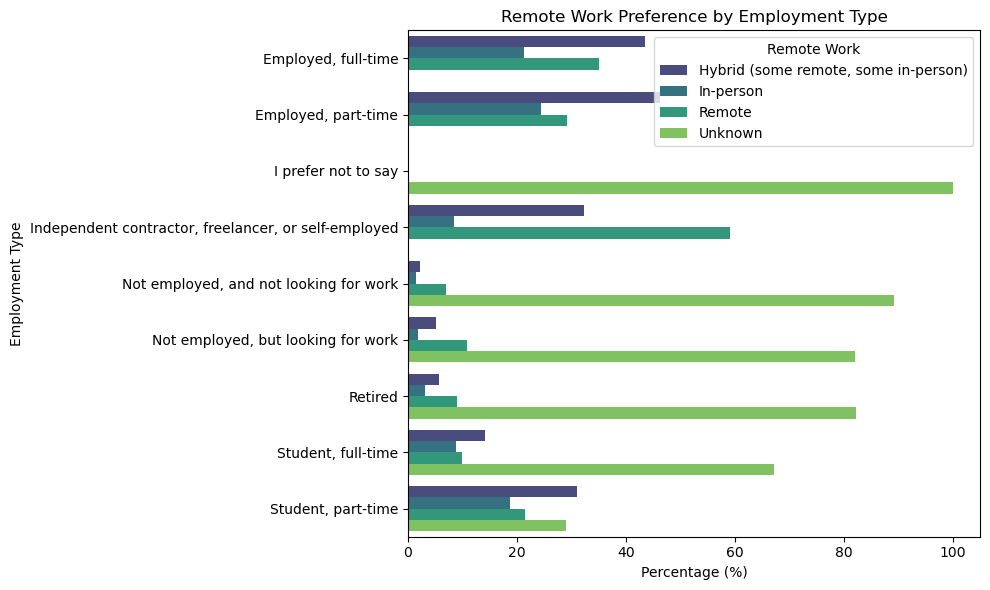

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=group_counts, x='Percentage', y='Employment', hue='RemoteWork', palette='viridis')
plt.title('Remote Work Preference by Employment Type')
plt.xlabel('Percentage (%)')
plt.ylabel('Employment Type')
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()


C:\Users\serge\AppData\Local\Temp\ipykernel_7008\1781015430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='pastel')


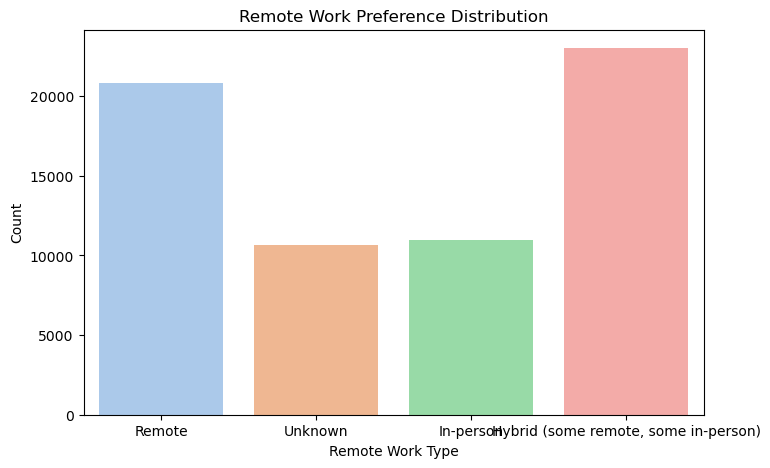

In [31]:
# Сount plot to show remote work distribution.1. Count Plot of Remote Work Distribution

# This shows how common each remote work setup is (Remote / Hybrid / On-site):

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='pastel')
plt.title('Remote Work Preference Distribution')
plt.xlabel('Remote Work Type')
plt.ylabel('Count')
plt.show()

    

2. Cross-tabulate by Employment and RemoteWork

Since there's no JobRole column, this step will show remote work preference split by employment type (e.g., full-time, student, self-employed).

In [33]:
# Clean up: remove or fill missing RemoteWork or Employment if needed
df_clean = df[['Employment', 'RemoteWork']].dropna()
df_clean
# Cross-tabulate
remote_ct = pd.crosstab(df_clean['Employment'], df_clean['RemoteWork'], normalize='index') * 100
remote_ct = remote_ct.reset_index()
remote_ct.head()


RemoteWork,Employment,"Hybrid (some remote, some in-person)",In-person,Remote,Unknown
0,"Employed, full-time",44.263723,21.905177,33.792679,0.038421
1,"Employed, full-time;Employed, part-time",40.094340,15.094340,44.811321,0.000000
2,"Employed, full-time;Independent contractor, fr...",37.391060,10.289570,52.319370,0.000000
3,"Employed, full-time;Independent contractor, fr...",43.478261,9.239130,47.282609,0.000000
4,"Employed, full-time;Independent contractor, fr...",0.000000,100.000000,0.000000,0.000000


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [36]:
# Get all unique countries in your data
unique_countries = df_exploded['Country'].dropna().unique()

# Base region mapping
base_map = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru'],
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Poland',
               'Sweden', 'Russia', 'Ukraine', 'Switzerland', 'Norway', 'Austria', 'Belgium',
               'Denmark', 'Finland', 'Ireland', 'Portugal', 'Czech Republic', 'Hungary', 'Greece', 'Romania'],
    'Asia': ['India', 'China', 'Japan', 'South Korea', 'Indonesia', 'Pakistan', 'Bangladesh',
             'Vietnam', 'Philippines', 'Thailand', 'Turkey', 'Singapore', 'Malaysia', 'Sri Lanka', 'Nepal'],
    'Africa': ['Nigeria', 'South Africa', 'Egypt', 'Kenya', 'Morocco', 'Algeria', 'Ghana', 'Ethiopia', 'Tanzania'],
    'Oceania': ['Australia', 'New Zealand'],
    'Middle East': ['Iran', 'Iraq', 'Israel', 'Saudi Arabia', 'United Arab Emirates',
                    'Jordan', 'Lebanon', 'Qatar']
}

# Build full region_map with default 'Other'
region_map = {}
for region, countries in base_map.items():
    for country in countries:
        region_map[country] = region

# Fill in any missing countries from your dataset as 'Other'
for country in unique_countries:
    if country not in region_map:
        region_map[country] = 'Other'

# Assign the new 'Region' column
df_exploded['Region'] = df_exploded['Country'].map(region_map)


In [37]:
## Write your code here
 # Split LanguageHaveWorkedWith

# Since the column contains semicolon-separated lists, first split it into individual languages using .str.split(';').

# Then use .explode() to turn each list into multiple rows, one per language.
df['Region'] = df['Country'].map(region_map)

df = df.dropna(subset=['LanguageHaveWorkedWith', 'Region'])  # Drop missing
df['Language'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('Language')
df_exploded['Language'] = df_exploded['Language'].str.strip()

In [38]:
# 3. Count Languages by Region

# Group by Region and Language, then count how many respondents in each region reported using each language:

lang_counts = df_exploded.groupby(['Region', 'Language']).size().reset_index(name='Count')


C:\Users\serge\AppData\Local\Temp\ipykernel_7008\1172272934.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_langs = lang_counts.groupby('Region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)


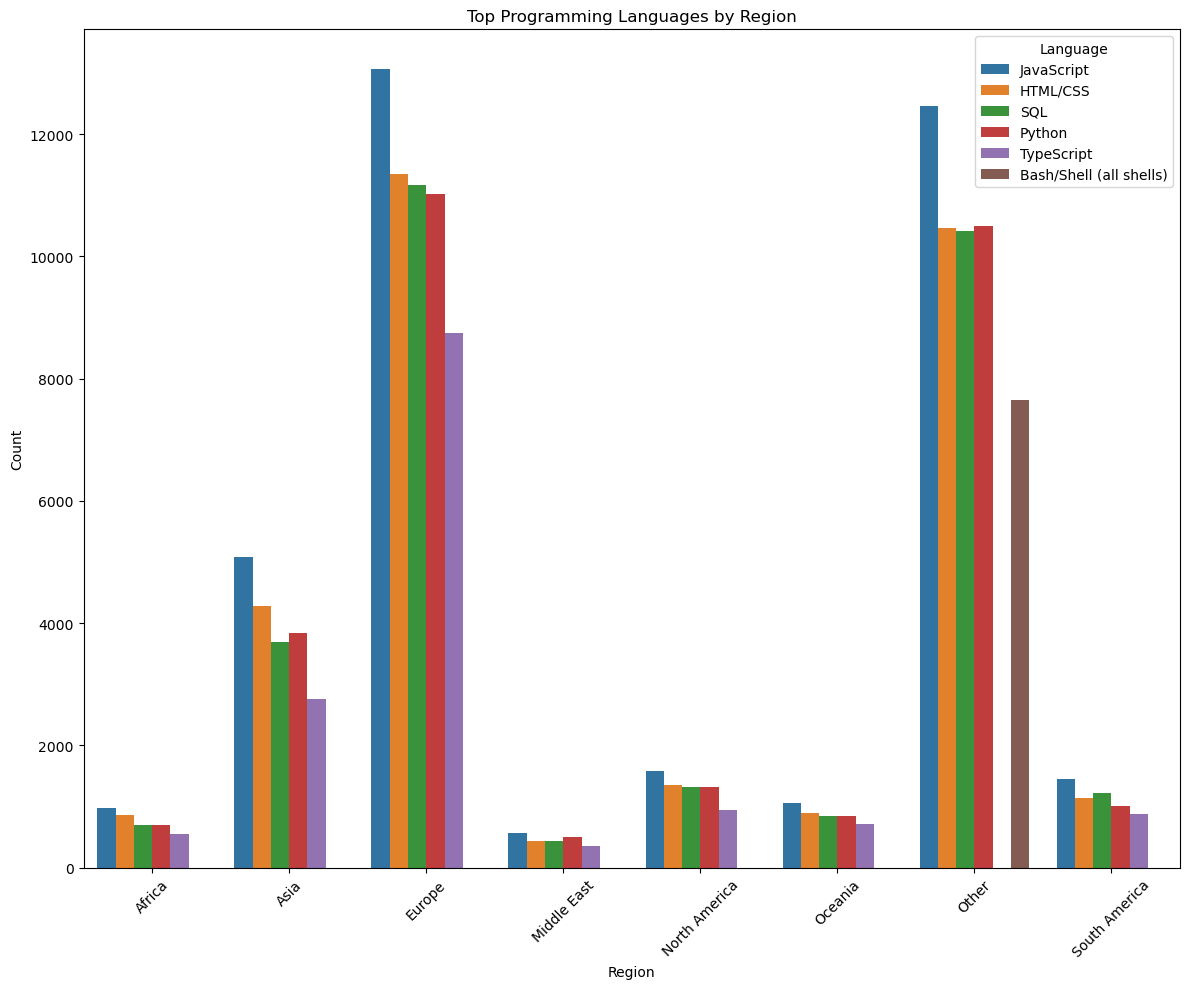

In [39]:
# Find Most Popular Languages per Region

# You can use groupby + nlargest or sort and head() to identify the top 5–10 languages per region.
# Visualize It
# A bar plot, heatmap, or stacked bar chart per region is helpful.
# Example using seaborn:

import seaborn as sns
import matplotlib.pyplot as plt

top_langs = lang_counts.groupby('Region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

plt.figure(figsize=(12, 10))
sns.barplot(data=top_langs, x='Region', y='Count', hue='Language')
plt.title("Top Programming Languages by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


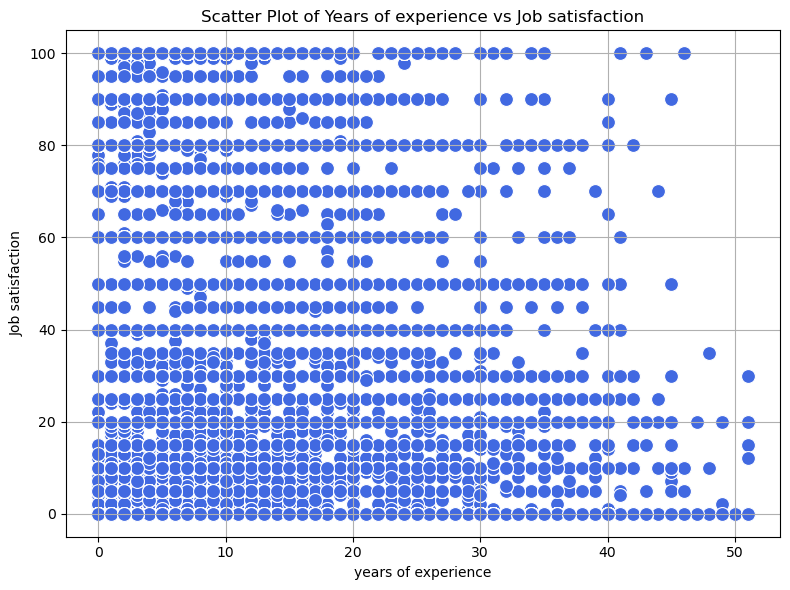

In [65]:
## Write your code here
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', color='royalblue', s=100)

# Labels and title
plt.title('Scatter Plot of Years of experience vs Job satisfaction')
plt.xlabel('years of experience')
plt.ylabel('Job satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [85]:
## Write your code here
 # Cross tabulation : 

# Clean up: remove or fill missing RemoteWork or Employment if needed
df_clean2 = df[['EdLevel','Employment']].dropna()

# Cross-tabulate
remote_ct = pd.crosstab(df_clean2['EdLevel'], df_clean2['Employment'], normalize='index') * 100
remote_ct = remote_ct.reset_index()
remote_ct.head()


Employment,EdLevel,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Student, part-time","Employed, full-time;Student, full-time;Student, part-time;Employed, part-time","Employed, full-time;Student, part-time","Employed, full-time;Student, part-time;Employed, part-time","Employed, part-time","Employed, part-time;Retired",I prefer not to say,"Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-employed;Employed, part-time","Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Independent contractor, freelancer, or self-employed;No

C:\Users\serge\AppData\Local\Temp\ipykernel_7008\2903023678.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


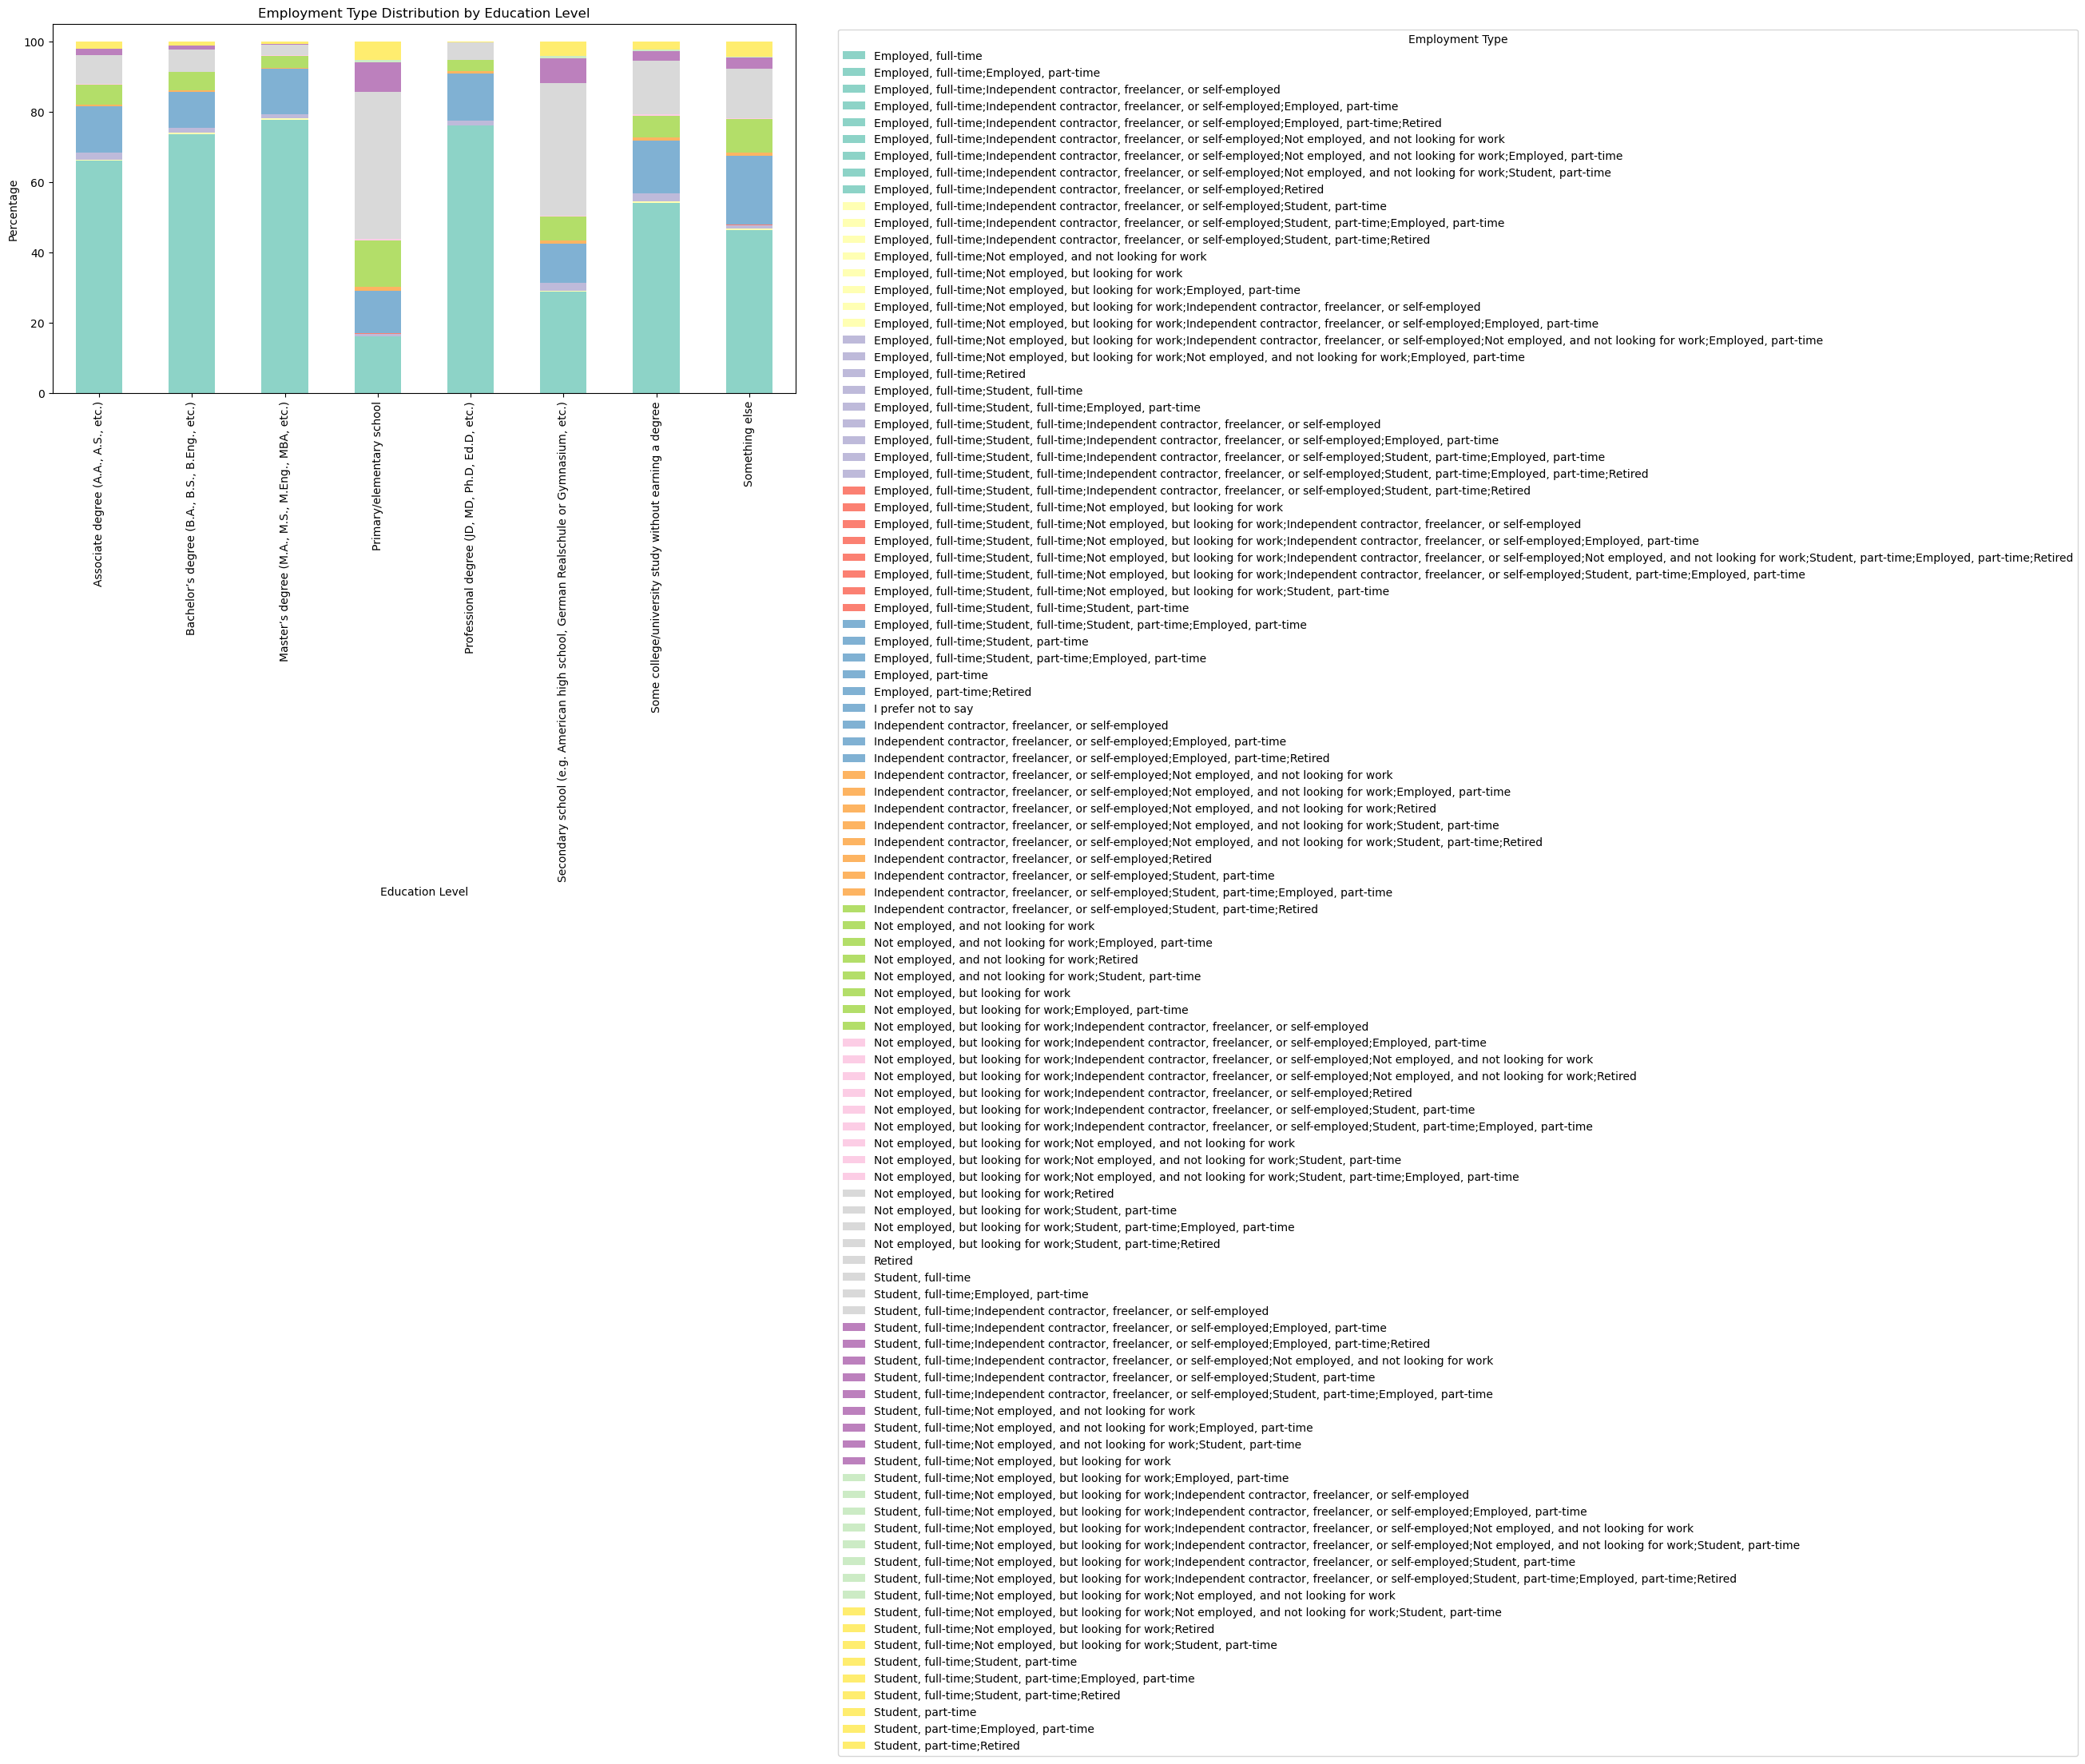

In [87]:
# Visualization - barplot : 
import matplotlib.pyplot as plt

# Set the EdLevel as index again for plotting
remote_ct_plot = remote_ct.set_index('EdLevel')

# Plot as stacked bar chart
remote_ct_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [91]:
## Write your code here


df_clean2.to_csv('df_clean2.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
